# Let's limit the data harvesting insanity.
I created a ready-to-go dataset so that the data analysis part may proceed without any issues arising from the FourSquare API hourly or daily limits (or any other nonsense). Let's keep it offline and proceed with the usual imports.

In [1]:
import numpy as np
import pandas as pd
import requests
from pandas.io.json import json_normalize
import folium
data = pd.read_csv('complete_df.csv')

In [2]:
data.shape

(116, 145)

In [3]:
data.columns

Index(['Unnamed: 0', 'id', 'location.address_x', 'location.crossStreet_x',
       'location.distance', 'location.formattedAddress_x', 'location.lat_x',
       'location.lng_x', 'location.postalCode_x', 'name_x',
       ...
       'specials.items', 'stats.tipCount', 'storeId', 'timeZone', 'tips.count',
       'tips.groups', 'url', 'venuePage.id_y', 'venueRatingBlacklisted',
       'verified'],
      dtype='object', length=145)

There are redundant columns, a result of a poorly done join (sorry). We can drop the redundant ones and just ignore the ''_y'' at the end of each column.

In [4]:
data.drop(['location.address_x', 'location.crossStreet_x',
       'location.distance', 'location.formattedAddress_x', 'location.lat_x',
       'location.lng_x', 'location.postalCode_x', 'name_x', 'venuePage.id_x', 'venuePage.id_y', 'Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.shape

(116, 134)

In [6]:
data.head()

,id,neighbourhood,referralId,allowMenuUrlEdit,attributes.groups,beenHere.count,beenHere.lastCheckinExpiredAt,beenHere.marked,beenHere.unconfirmedCount,bestPhoto.createdAt,...,specials.count,specials.items,stats.tipCount,storeId,timeZone,tips.count,tips.groups,url,venueRatingBlacklisted,verified
0,4c3a2741ae2da593bfc503c6,BRERA,v-1558628041,True,"[{'type': 'price', 'name': 'Price', 'summary':...",0,0,False,0,1.357568e+09,...,0,[],45,NaN,Europe/Rome,45,"[{'type': 'others', 'name': 'All tips', 'count...",NaN,NaN,False
1,4bb5f3c62ea1952143ecaa2f,BRERA,v-1558628041,True,"[{'type': 'price', 'name': 'Price', 'summary':...",0,0,False,0,1.352123e+09,...,0,[],55,NaN,Europe/Rome,55,"[{'type': 'others', 'name': 'All tips', 'count...",http://www.amorino.com/it/newsletter-it/partic...,NaN,False
2,55e1c0b1498e7d11ef90db84,BRERA,v-1558628041,True,"[{'type': 'price', 'name': 'Price', 'summary':...",0,0,False,0,1.539437e+09,...,0,[],13,NaN,Europe/Rome,13,"[{'type': 'others', 'name': 'All tips', 'count...",http://www.bioesseri.it,NaN,False
3,52e90566498e6594223562e2,BRERA,v-1558628041,True,"[{'type': 'price', 'name': 'Price', 'summary':...",0,0,False,0,1.493206e+09,...,0,[],0,NaN,Europe/Rome,0,"[{'type': 'others', 'name': 'All tips', 'count...",NaN,NaN,False
4,4b05887ef964a520aac922e3,BRERA,v-1558628041,True,"[{'type': 'price', 'name': 'Price', 'summary':...",0,0,False,0,1.335992e+09,...,0,[],55,NaN,Europe/Rome,55,"[{'type': 'others', 'name': 'All tips', 'count...",http://www.nabucco.it,NaN,False


In [7]:
data.describe()

,beenHere.count,beenHere.lastCheckinExpiredAt,beenHere.unconfirmedCount,bestPhoto.createdAt,bestPhoto.height,bestPhoto.width,colors.algoVersion,colors.highlightColor.value,colors.highlightTextColor.value,contact.facebook,...,parent.location.postalCode,photos.count,price.tier,rating,ratingSignals,reasons.count,specials.count,stats.tipCount,storeId,tips.count
count,116.0,116.0,116.0,1.050000e+02,105.000000,105.000000,75.0,7.500000e+01,7.500000e+01,2.400000e+01,...,14.000000,116.000000,98.000000,70.000000,70.000000,116.000000,116.0,116.000000,0.0,116.000000
mean,0.0,0.0,0.0,1.442429e+09,1272.504762,1162.276190,3.0,-1.046389e+07,-5.592406e+06,6.033844e+14,...,20140.285714,66.836207,1.969388,7.170000,129.557143,0.318966,0.0,16.155172,NaN,16.155172
std,0.0,0.0,0.0,8.559631e+07,761.324834,645.705019,0.0,4.638240e+06,7.962114e+06,5.915077e+14,...,18.755219,205.837164,0.866966,0.948737,276.835306,0.468098,0.0,34.741681,NaN,34.741681
min,0.0,0.0,0.0,1.314453e+09,325.000000,500.000000,3.0,-1.624678e+07,-1.677722e+07,2.273853e+10,...,20121.000000,0.000000,1.000000,5.000000,8.000000,0.000000,0.0,0.000000,NaN,0.000000
25%,0.0,0.0,0.0,1.365795e+09,720.000000,720.000000,3.0,-1.467185e+07,-1.677722e+07,1.720207e+14,...,20121.750000,3.750000,1.000000,6.325000,21.500000,0.000000,0.0,1.000000,NaN,1.000000
50%,0.0,0.0,0.0,1.417620e+09,960.000000,960.000000,3.0,-1.204014e+07,-1.000000e+00,3.855638e+14,...,20139.000000,11.000000,2.000000,7.300000,61.000000,0.000000,0.0,4.000000,NaN,4.000000
75%,0.0,0.0,0.0,1.543045e+09,1920.000000,1440.000000,3.0,-7.303024e+06,-1.000000e+00,8.730719e+14,...,20159.000000,52.750000,3.000000,7.900000,121.500000,1.000000,0.0,19.250000,NaN,19.250000
max,0.0,0.0,0.0,1.558376e+09,5739.000000,4134.000000,3.0,-4.626640e+05,-1.000000e+00,1.965795e+15,...,20159.000000,1615.000000,3.000000,8.800000,1884.000000,1.000000,0.0,276.000000,NaN,276.000000


In [8]:
data['price.tier'].unique()

array([ 2.,  3.,  1., nan])

In [9]:
data['rating'].unique()

array([6.6, 8. , 7.9, nan, 8.2, 7.3, 7.7, 8.4, 6.8, 6.1, 8.1, 7.1, 8.3,
       5.9, 6.9, 7.5, 7.2, 7.8, 6. , 8.8, 6.4, 6.3, 5.1, 6.5, 7.6, 7. ,
       5.7, 5. , 5.8, 8.7, 6.2, 7.4, 8.6, 5.5])

While having more venues would be great, harvesting extra ones with a free FourSquare account isn't a viable option. We 'have' to remove venues with no ratings, if we are to consider ratings our core concern.

In [10]:
data.dropna(subset=['rating'], axis=0, inplace=True)
data.reindex()
data.reset_index(drop=True, inplace=True)

In [11]:
data.shape

(70, 134)

We have lost quite a few, sadly. We should still be able to do some rudimentary data analysis. Let's plot the distribution of the "survivors" by neighbourhood. As we can see, Brera and Garibaldi-Repubblica both seem to feature appreciated venues (and both sport a left skewed distribution), whereas Magenta - San Vittore venues got lower reviews, according to our sample.

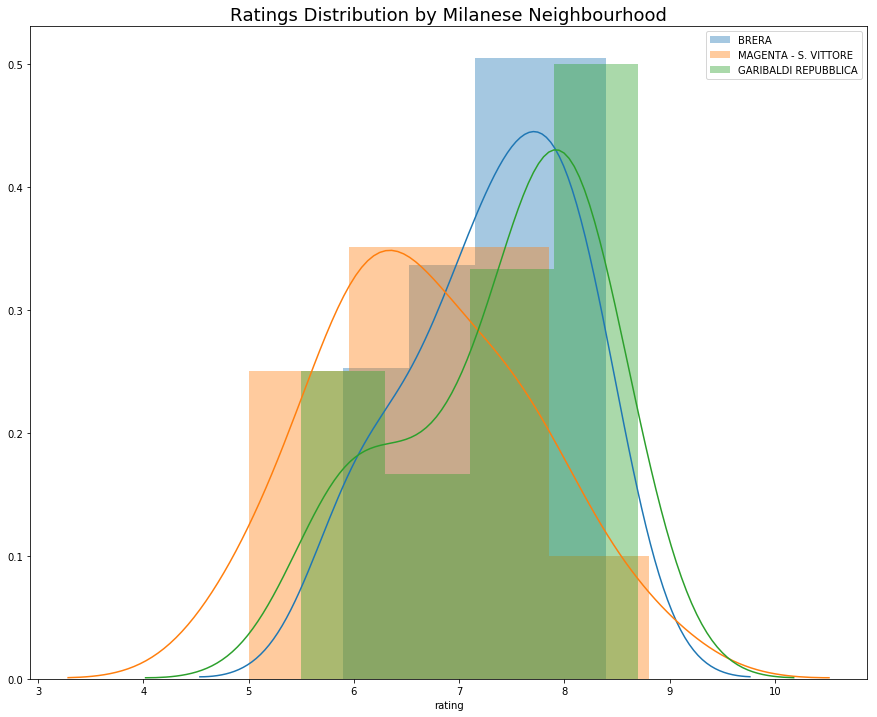

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(15,12))
ax= sns.distplot(data.loc[data['neighbourhood'] == 'BRERA']['rating'])
ax = sns.distplot(data.loc[data['neighbourhood'] == 'MAGENTA - S. VITTORE']['rating'])
ax = sns.distplot(data.loc[data['neighbourhood'] == 'GARIBALDI REPUBBLICA']['rating'])
ax.legend(['BRERA', 'MAGENTA - S. VITTORE', 'GARIBALDI REPUBBLICA'])
ax.set_title('Ratings Distribution by Milanese Neighbourhood', fontsize=18)
sns.set_style({'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})
plt.savefig('ratings-distribution.png', bbox_inches='tight')


In [13]:
data[data['neighbourhood'] == 'GARIBALDI REPUBBLICA'].shape

(30, 134)

In [ ]:
print(sorted(data['rating'].unique()))
print(len(data['rating'].unique()))

[5.0, 5.1, 5.5, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.6, 8.7, 8.8]
33


In [ ]:
data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

Index(['beenHere.count', 'beenHere.lastCheckinExpiredAt',
       'beenHere.unconfirmedCount', 'bestPhoto.createdAt', 'bestPhoto.height',
       'bestPhoto.width', 'colors.algoVersion', 'colors.highlightColor.value',
       'colors.highlightTextColor.value', 'contact.facebook', 'contact.phone',
       'createdAt', 'hereNow.count', 'inbox.count', 'likes.count',
       'listed.count', 'location.lat_y', 'location.lng_y',
       'location.postalCode_y', 'page.pageInfo.links.count', 'page.user.bio',
       'page.user.contact.facebook', 'page.user.id', 'page.user.tips.count',
       'pageUpdates.count', 'parent.location.lat', 'parent.location.lng',
       'parent.location.postalCode', 'photos.count', 'price.tier', 'rating',
       'ratingSignals', 'reasons.count', 'specials.count', 'stats.tipCount',
       'storeId', 'tips.count'],
      dtype='object')

In [ ]:
!pip install colour
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),50))
ratings_list = data['rating']
colors_list=[]
for rating in ratings_list:
    colors_list.append(str(colors[round(rating*10 - 50)]))
len(colors_list)
print(colors_list)

['#d68b00', '#89b100', '#93b400', '#77ac00', '#c3b700', '#a6b900', '#66a700', '#a6b900', '#d09900', '#a6b900', '#e26600', '#80af00', '#c9ac00', '#6fa900', '#e85500', '#cea000', '#babe00', '#c6b200', '#9cb600', '#e55e00', '#469d00', '#db7d00', '#cea000', '#dd7500', '#e85500', '#fc0a00', '#d88400', '#77ac00', '#dd7500', '#d68b00', '#b0bc00', '#b0bc00', '#e85500', '#cba600', '#ed4400', '#e55e00', 'red', '#6fa900', '#b0bc00', '#ea4c00', '#80af00', '#b0bc00', '#89b100', '#b0bc00', '#4e9f00', '#9cb600', '#c3b700', '#93b400', '#9cb600', '#e55e00', '#e26600', '#cea000', '#6fa900', '#89b100', '#e06e00', '#d09900', '#c3b700', '#c3b700', '#e85500', '#c1bd00', '#93b400', '#9cb600', '#e26600', '#d88400', '#56a200', '#80af00', '#cba600', '#f23100', '#66a700', '#6fa900']


In [ ]:
def get_categories(unprocessed_string):
    my_list = []
    for i, x in enumerate(unprocessed_string.split("'")):
        if x == 'name':
            my_list.append(unprocessed_string.split("'")[i+2])
    return my_list

In [ ]:
data['categories_list'] = data['categories'].apply(get_categories)

In [ ]:
def categories_dummies(data):
    categories_set = set()
    for index, row in data.iterrows():
        for item in data.loc[index]['categories_list']:
            categories_set.add(item)
            data.loc[index, 'is_' + item] = 1
    for index, row in data.iterrows():
        for item in categories_set:
            if np.isnan(data.loc[index, 'is_' + item]):
                data.loc[index, 'is_' + item] = 0

In [ ]:
get_categories(data['categories'][0])

['Cocktail Bar', 'Café', 'Bar']

In [ ]:
categories_dummies(data)

In [ ]:
data.is_Bar.unique()

array([1., 0.])

In [ ]:
data['is_Italian Restaurant'][:5]

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: is_Italian Restaurant, dtype: float64

In [ ]:
#for c in data.columns:
#    print(c)

This map shows the venues in the three selected neighbourhoods, besides providing us with a traffic lights-like visual indicator of the rating. Each marker features the name of the venue, the rating, and the categories it belongs to.

In [ ]:
from folium.plugins import MarkerCluster
from folium.features import Choropleth

restaurants_map = folium.Map(location=[45.473538, 9.181776], tiles="cartodbdark_matter", zoom_start=14)

for index, row in data.iterrows():
    popup = data.loc[index]['name_y'] + ', rated: ' + str(data.loc[index]['rating']) + ', categories:' + str(data.loc[index]['categories_list']).replace('[', '').replace(']', '')
    folium.Marker([data.loc[index]['location.lat_y'], data.loc[index]['location.lng_y']], popup=popup, icon=folium.Icon(icon='glyphicon-cutlery', color='white', icon_color=colors_list[index])).add_to(restaurants_map)


Choropleth(geo_data='nilzone_lnglat.geojson', fill_color='gray', line_color='green', fill_opacity=0.4,
            line_weight=3).add_to(restaurants_map)
restaurants_map

We can create a smaller dataset for our current needs.

In [ ]:
data_0 = data[['name_y', 'id', 'neighbourhood', 'rating', 'price.tier',
             'location.lat_y', 'location.lng_y', 'is_Cocktail Bar',
             'is_Café', 'is_Bar', 'is_Ice Cream Shop', 'is_Restaurant',
             'is_Italian Restaurant', 'is_Bakery', 'is_Pizza Place',
             'is_French Restaurant', 'is_Lounge', 'is_Seafood Restaurant',
             'is_Mediterranean Restaurant', 'is_Diner', 'is_Bistro',
             'is_Breakfast Spot', 'is_American Restaurant', 'is_Pie Shop',
             'is_Snack Place', 'is_Museum', 'is_Dessert Shop',
             'is_Chocolate Shop', 'is_Art Gallery', 'is_Convention Center',
             'is_Gourmet Shop', 'is_Food & Drink Shop', 'is_Bookstore',
             'is_Coffee Shop', 'is_Boutique', 'is_Gastropub', 'is_Pub',
             'is_Vegetarian / Vegan Restaurant', 'is_Mexican Restaurant', 
             'is_Brewery', 'is_Burger Joint', 'is_Thai Restaurant',
             'is_Ramen Restaurant', 'is_Emilia Restaurant', 'is_Piadineria']]

In [ ]:
data_0.head()

,name_y,id,neighbourhood,rating,price.tier,location.lat_y,location.lng_y,is_Cocktail Bar,is_Café,is_Bar,...,is_Gastropub,is_Pub,is_Vegetarian / Vegan Restaurant,is_Mexican Restaurant,is_Brewery,is_Burger Joint,is_Thai Restaurant,is_Ramen Restaurant,is_Emilia Restaurant,is_Piadineria
0,Bar Brera,4c3a2741ae2da593bfc503c6,BRERA,6.6,2.0,45.472260,9.187459,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Amorino,4bb5f3c62ea1952143ecaa2f,BRERA,8.0,2.0,45.472052,9.185834,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bioesserì,55e1c0b1498e7d11ef90db84,BRERA,7.9,3.0,45.473016,9.188367,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nabucco,4b05887ef964a520aac922e3,BRERA,8.2,3.0,45.472159,9.186968,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Panificio Pattini,4ceff84c8604a1cdb70c00c1,BRERA,7.3,1.0,45.473762,9.187213,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_0.describe()

,rating,price.tier,location.lat_y,location.lng_y,is_Cocktail Bar,is_Café,is_Bar,is_Ice Cream Shop,is_Restaurant,is_Italian Restaurant,...,is_Gastropub,is_Pub,is_Vegetarian / Vegan Restaurant,is_Mexican Restaurant,is_Brewery,is_Burger Joint,is_Thai Restaurant,is_Ramen Restaurant,is_Emilia Restaurant,is_Piadineria
count,70.000000,59.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,7.170000,2.118644,45.474449,9.183846,0.057143,0.285714,0.042857,0.085714,0.057143,0.314286,...,0.028571,0.014286,0.014286,0.028571,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286
std,0.948737,0.811230,0.007932,0.007883,0.233791,0.455016,0.203997,0.281963,0.233791,0.467583,...,0.167802,0.119523,0.119523,0.167802,0.119523,0.119523,0.119523,0.119523,0.119523,0.119523
min,5.000000,1.000000,45.462193,9.168347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.325000,1.000000,45.465699,9.173652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.300000,2.000000,45.475301,9.187383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.900000,3.000000,45.481802,9.188968,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.800000,3.000000,45.483727,9.193710,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_0 = pd.get_dummies(data=data_0, columns=['neighbourhood'])

The correlation matrix is not a complete disappointment. While there are not so many strong correlations (except for the lone venues being the only representatives of 2 categories), we can notice how rating is weakly correlated with price tiers, being an ice-cream shop/boutique, being in Garibaldi - Repubblica, and weakly negatively correlated with being in Magenta - San Vittore or a bakery. Italian restaurants seem to be overall pricier than the alternatives (0.63 correlation with the price tier, going 1 to 3, with 3 being the most expensive tier), besides a way weaker correlation between price tiers and seafood restaurants. Bakeries tend to belong to the cheaper tier(s), it seems. Neighbourhood-wise, Brera venues seem to be slightly more likely to be more expensive, Magenta - San Vittore ones tend to be slightly less likely to be expensive. 

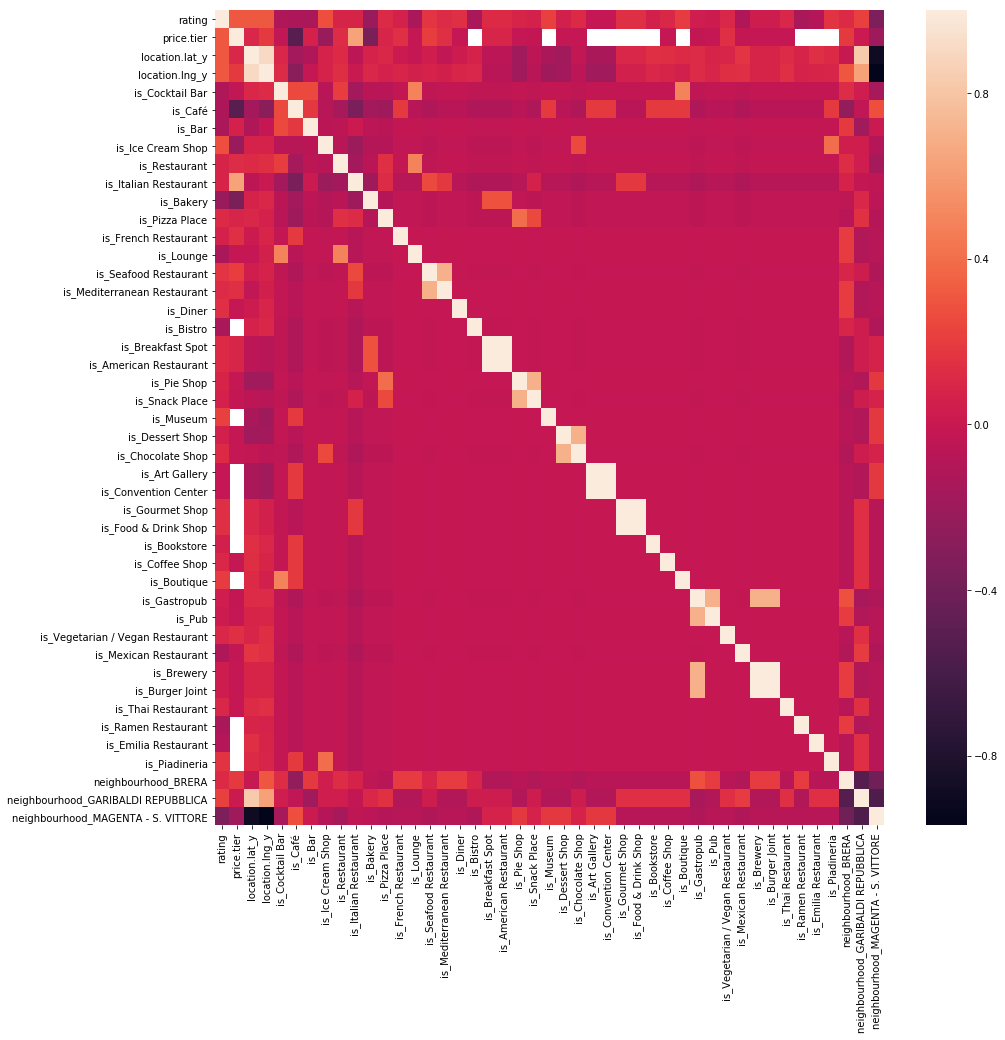

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax = sns.heatmap(data_0.corr())
plt.savefig('correlation-matrix.png', bbox_inches='tight')

In [ ]:
corr_matrix = data_0[['rating', 'is_Cocktail Bar', 'price.tier',
             'is_Café', 'is_Bar', 'is_Ice Cream Shop', 'is_Restaurant',
             'is_Italian Restaurant', 'is_Bakery', 'is_Pizza Place',
             'is_French Restaurant', 'is_Lounge', 'is_Seafood Restaurant',
             'is_Mediterranean Restaurant', 'is_Diner', 'is_Bistro',
             'is_Breakfast Spot', 'is_American Restaurant', 'is_Pie Shop',
             'is_Snack Place', 'is_Museum', 'is_Dessert Shop',
             'is_Chocolate Shop', 'is_Art Gallery', 'is_Convention Center',
             'is_Gourmet Shop', 'is_Food & Drink Shop', 'is_Bookstore',
             'is_Coffee Shop', 'is_Boutique', 'is_Gastropub', 'is_Pub',
             'is_Vegetarian / Vegan Restaurant', 'is_Mexican Restaurant', 
             'is_Brewery', 'is_Burger Joint', 'is_Thai Restaurant',
             'is_Ramen Restaurant', 'is_Emilia Restaurant', 'is_Piadineria', 'neighbourhood_BRERA',
'neighbourhood_GARIBALDI REPUBBLICA', 'neighbourhood_MAGENTA - S. VITTORE']].corr()
corr_matrix

,rating,is_Cocktail Bar,price.tier,is_Café,is_Bar,is_Ice Cream Shop,is_Restaurant,is_Italian Restaurant,is_Bakery,is_Pizza Place,...,is_Mexican Restaurant,is_Brewery,is_Burger Joint,is_Thai Restaurant,is_Ramen Restaurant,is_Emilia Restaurant,is_Piadineria,neighbourhood_BRERA,neighbourhood_GARIBALDI REPUBBLICA,neighbourhood_MAGENTA - S. VITTORE
rating,1.000000,-0.116305,0.313420,-0.127574,-0.135537,0.275218,0.079714,0.080368,-0.209057,0.112688,...,-0.121987,0.029396,0.029396,0.093299,-0.136753,-0.085631,0.157202,0.111523,0.214529,-0.339892
is_Cocktail Bar,-0.116305,1.000000,-0.034141,0.253012,0.251784,-0.075378,0.204545,-0.166667,-0.068279,-0.075378,...,-0.042220,-0.029637,-0.029637,-0.029637,-0.029637,-0.029637,-0.029637,0.126537,0.035533,-0.161165
price.tier,0.313420,-0.034141,1.000000,-0.521676,0.061780,-0.207423,0.127864,0.638540,-0.347539,0.089808,...,-0.027631,-0.019369,-0.019369,-0.019369,NaN,NaN,NaN,0.185325,0.011717,-0.191859
is_Café,-0.127574,0.253012,-0.521676,1.000000,0.178440,-0.080687,-0.155700,-0.360056,-0.175412,-0.193649,...,-0.108465,-0.076139,-0.076139,-0.076139,-0.076139,-0.076139,0.190347,-0.243809,-0.036515,0.276026
is_Bar,-0.135537,0.251784,0.061780,0.178440,1.000000,-0.064790,-0.052093,0.008682,-0.058688,-0.064790,...,-0.036290,-0.025474,-0.025474,-0.025474,-0.025474,-0.025474,-0.025474,0.188069,-0.183254,0.015392
is_Ice Cream Shop,0.275218,-0.075378,-0.207423,-0.080687,-0.064790,1.000000,-0.075378,-0.207289,-0.084921,-0.093750,...,-0.052511,-0.036860,-0.036860,-0.036860,-0.036860,-0.036860,0.393179,0.042623,0.044194,-0.089087
is_Restaurant,0.079714,0.204545,0.127864,-0.155700,-0.052093,-0.075378,1.000000,-0.166667,-0.068279,0.144474,...,-0.042220,-0.029637,-0.029637,-0.029637,-0.029637,-0.029637,-0.029637,0.126537,0.035533,-0.161165
is_Italian Restaurant,0.080368,-0.166667,0.638540,-0.360056,0.008682,-0.207289,-0.166667,1.000000,-0.187767,0.122489,...,-0.116105,-0.081502,-0.081502,-0.081502,-0.081502,-0.081502,-0.081502,0.071177,-0.026650,-0.040291
is_Bakery,-0.209057,-0.068279,-0.347539,-0.175412,-0.058688,-0.084921,-0.068279,-0.187767,1.000000,-0.084921,...,-0.047565,-0.033389,-0.033389,-0.033389,-0.033389,-0.033389,-0.033389,-0.044549,0.096077,-0.060523
is_Pizza Place,0.112688,-0.075378,0.089808,-0.193649,-0.064790,-0.093750,0.144474,0.122489,-0.084921,1.000000,...,-0.052511,-0.036860,-0.036860,-0.036860,-0.036860,-0.036860,-0.036860,-0.072132,0.147314,-0.089087


There seems to be a weak correlation between ratings and being a museum or ice-cream shop. Moreover, venues in Garibaldi-Repubblica seem to be somewhat more popular than those in the other two neighbourhoods, especially if we consider venues in Magenta - San Vittore (slightly stronger negative weak correlation with ratings). Being a bakery doesn't help, either. If we think about it, bakeries and supermarkets are less likely to amaze us, but in case of problems they will surely anger us (just like couriers; if we get our package in time and consistently so, we're alright with that, while the slightest delay will result in delivery companies becoming the target of jokes and negative reviews). It seems that being a baker is tougher than what some people think, isn't it? Unless this outcome is a consequence of having chosen this kind of sample (there may be bakeries with stellar reviews and enthusiastic customers elsewhere). Ice-cream shops (and museums? Probably museums that have a cafeteria), according to our sample and analysis, seem to be enjoyed by customers, considering how they're slightly more likely than average to leave a positive review.

In [ ]:
sorted(corr_matrix['rating'], reverse=True)

[1.0,
 0.3134199800250163,
 0.27521800616609243,
 0.21452907547288103,
 0.20832519796230595,
 0.1955445109707532,
 0.1693254483327202,
 0.15720244999609584,
 0.14442176300454343,
 0.1444217630045434,
 0.1444217630045434,
 0.11886038902143822,
 0.11470433596732663,
 0.11470433596732663,
 0.11470433596732658,
 0.11268768756406936,
 0.11152304230223689,
 0.10607970202988583,
 0.09329901503833338,
 0.09329901503833335,
 0.08051832804678076,
 0.08036776523001117,
 0.07971436876472644,
 0.06918674232949856,
 0.06773764105522834,
 0.05495695406367574,
 0.05495695406367574,
 0.03277266741923618,
 0.029395580080570815,
 0.029395580080570815,
 0.01661489308901823,
 -0.021727167885639265,
 -0.021727167885639265,
 -0.08563060284340178,
 -0.11630457082066661,
 -0.12198715094937905,
 -0.12757404935241604,
 -0.13109066967694463,
 -0.13553744367804763,
 -0.1367533508096118,
 -0.1367533508096119,
 -0.2090573383115925,
 -0.33989243640034045]

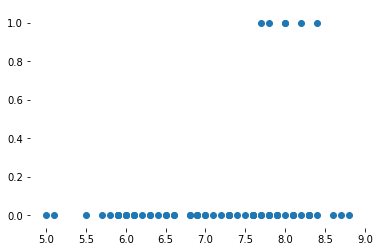

In [ ]:
plt.scatter(data_0['rating'], data_0['is_Ice Cream Shop'])

In [ ]:
data_0.dtypes

name_y                                 object
id                                     object
rating                                float64
price.tier                            float64
location.lat_y                        float64
location.lng_y                        float64
is_Cocktail Bar                       float64
is_Café                               float64
is_Bar                                float64
is_Ice Cream Shop                     float64
is_Restaurant                         float64
is_Italian Restaurant                 float64
is_Bakery                             float64
is_Pizza Place                        float64
is_French Restaurant                  float64
is_Lounge                             float64
is_Seafood Restaurant                 float64
is_Mediterranean Restaurant           float64
is_Diner                              float64
is_Bistro                             float64
is_Breakfast Spot                     float64
is_American Restaurant            

In [ ]:
data_0.head()

,name_y,id,rating,price.tier,location.lat_y,location.lng_y,is_Cocktail Bar,is_Café,is_Bar,is_Ice Cream Shop,...,is_Mexican Restaurant,is_Brewery,is_Burger Joint,is_Thai Restaurant,is_Ramen Restaurant,is_Emilia Restaurant,is_Piadineria,neighbourhood_BRERA,neighbourhood_GARIBALDI REPUBBLICA,neighbourhood_MAGENTA - S. VITTORE
0,Bar Brera,4c3a2741ae2da593bfc503c6,6.6,2.0,45.472260,9.187459,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,Amorino,4bb5f3c62ea1952143ecaa2f,8.0,2.0,45.472052,9.185834,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,Bioesserì,55e1c0b1498e7d11ef90db84,7.9,3.0,45.473016,9.188367,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,Nabucco,4b05887ef964a520aac922e3,8.2,3.0,45.472159,9.186968,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,Panificio Pattini,4ceff84c8604a1cdb70c00c1,7.3,1.0,45.473762,9.187213,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [ ]:
dummies_cols = ['is_Cocktail Bar',
             'is_Café', 'is_Bar', 'is_Ice Cream Shop', 'is_Restaurant',
             'is_Italian Restaurant', 'is_Bakery', 'is_Pizza Place',
             'is_French Restaurant', 'is_Lounge', 'is_Seafood Restaurant',
             'is_Mediterranean Restaurant', 'is_Diner', 'is_Bistro',
             'is_Breakfast Spot', 'is_American Restaurant', 'is_Pie Shop',
             'is_Snack Place', 'is_Museum', 'is_Dessert Shop',
             'is_Chocolate Shop', 'is_Art Gallery', 'is_Convention Center',
             'is_Gourmet Shop', 'is_Food & Drink Shop', 'is_Bookstore',
             'is_Coffee Shop', 'is_Boutique', 'is_Gastropub', 'is_Pub',
             'is_Vegetarian / Vegan Restaurant', 'is_Mexican Restaurant', 
             'is_Brewery', 'is_Burger Joint', 'is_Thai Restaurant',
             'is_Ramen Restaurant', 'is_Emilia Restaurant', 'is_Piadineria']

brera_dict = {}
garibaldi_dict = {}
magenta_dict = {}
for col in dummies_cols:
    brera_dict[col] = data.loc[data['neighbourhood'] == 'BRERA', col].sum()
    garibaldi_dict[col] = data.loc[data['neighbourhood'] == 'GARIBALDI REPUBBLICA', col].sum()
    magenta_dict[col] = data.loc[data['neighbourhood'] == 'MAGENTA - S. VITTORE', col].sum()
brera = pd.Series(brera_dict)
garibaldi = pd.Series(garibaldi_dict)
magenta = pd.Series(magenta_dict)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,12))
ax = brera[brera > 0].plot.bar()
plt.xticks(rotation=-80, fontsize=13)
plt.title('How many venues nearby the Brera neighbourhood centre?', fontsize=20)
plt.savefig('venues-brera.png', bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,12))
ax = garibaldi[garibaldi > 0].plot.bar()
plt.xticks(rotation=-80, fontsize=13)
plt.title('How many venues nearby the Garibaldi Repubblica neighbourhood centre?', fontsize=20)
plt.savefig('venues-garibaldi.png', bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,12))
ax = magenta[magenta > 0].plot.bar()
plt.xticks(rotation=-80, fontsize=13)
plt.title('How many venues nearby the Magenta - S. Vittore neighbourhood centre?', fontsize=20)
plt.savefig('venues-magenta.png', bbox_inches='tight')
